Objective:
Utilize synthetic medical data to predict 5-year survival rates post-lung cancer diagnosis by effectively selecting key features from patient treatment trajectories.
Possible approach:
1. Feature Selection: Use algorithms like PCA and Stepwise Selection to identify crucial features.
2. Subsequence Analysis: Find frequent subsequences within treatment trajectories for additional predictive value. Effectiveness (performance) of the algorithm is important.
3. Use network science approach. Using graphs and extracting key-player nodes as features and using them for prediction.
4. Any custom approach.
End result:
Predictive Model: Develop a workflow that, given patient treatment trajectory data, outputs a 5-year survival prediction. Workflow will be tested on a test set not seen by students and compared with other groups work.
Outcome:
A concise list of significant features, an understanding of vital treatment subsequences, and a prediction function for stakeholder use.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [4]:
# Reading the lung cancer dataset
data = pd.read_csv("synthetic_data_lung_cancer.csv")

# Displaying the first few rows of the dataset
print(data.head())


   SUBJECT_ID    DEFINITION_ID      TIME
0           1         drug_217  0.004807
1           1   condition_1922  0.008643
2           1    condition_785  0.027792
3           1          drug_49  0.032515
4           1  measurement_132  0.056765


In [5]:
# Creating the 'CATEGORY' column by extracting the category from 'DEFINITION_ID'
data['CATEGORY'] = data['DEFINITION_ID'].apply(lambda x: x.split('_')[0])

# Displaying the first few rows to verify the new column
print(data.head())

   SUBJECT_ID    DEFINITION_ID      TIME     CATEGORY
0           1         drug_217  0.004807         drug
1           1   condition_1922  0.008643    condition
2           1    condition_785  0.027792    condition
3           1          drug_49  0.032515         drug
4           1  measurement_132  0.056765  measurement


In [ ]:
data['CATEGORY'].unique()

array(['drug', 'condition', 'measurement', 'observation', 'procedure',
       'death'], dtype=object)

## Visual Exploratory Data Analysis

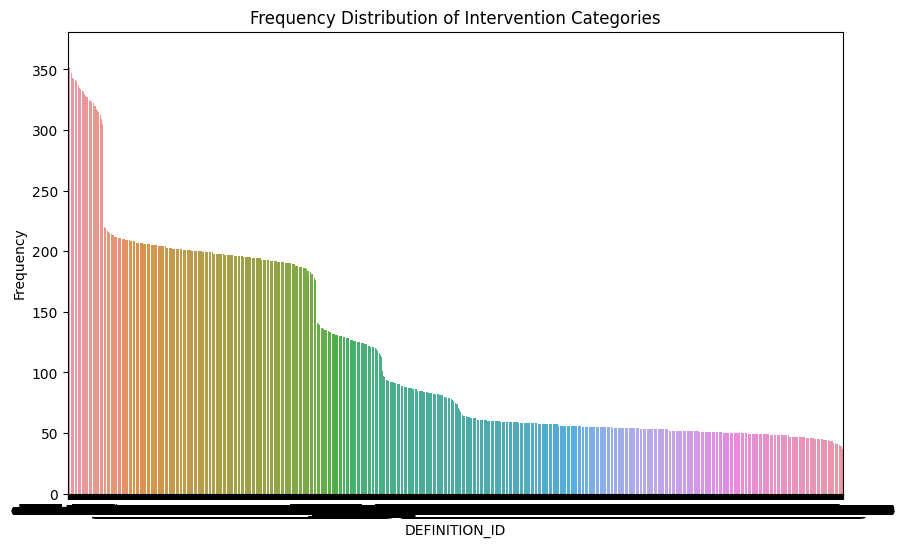

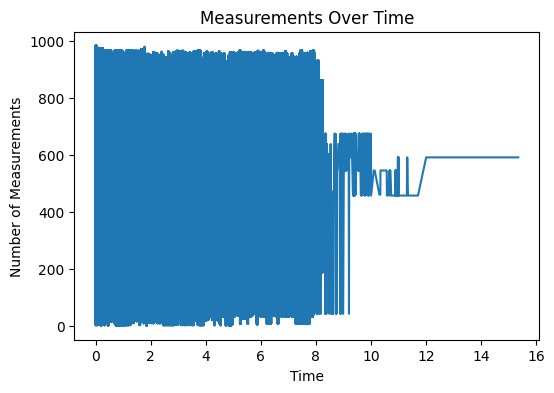

In [6]:
# 1. Visualize the Frequency Distribution of Intervention Categories
plt.figure(figsize=(10, 6))
sns.countplot(x='DEFINITION_ID', data=data, order = data['DEFINITION_ID'].value_counts().index)
plt.title('Frequency Distribution of Intervention Categories')
plt.ylabel('Frequency')
#plt.xticks(rotation=45)
plt.show()

# 2. Create Time Series Plots
# Plotting just for 'measurement' category as an example
measurements_over_time = data[data['CATEGORY'] == 'measurement']
plt.figure(figsize=(6, 4))
sns.lineplot(x='TIME', y='SUBJECT_ID', data=measurements_over_time, estimator=None)
plt.title('Measurements Over Time')
plt.ylabel('Number of Measurements')
plt.xlabel('Time')
plt.show()


## Data for year 1

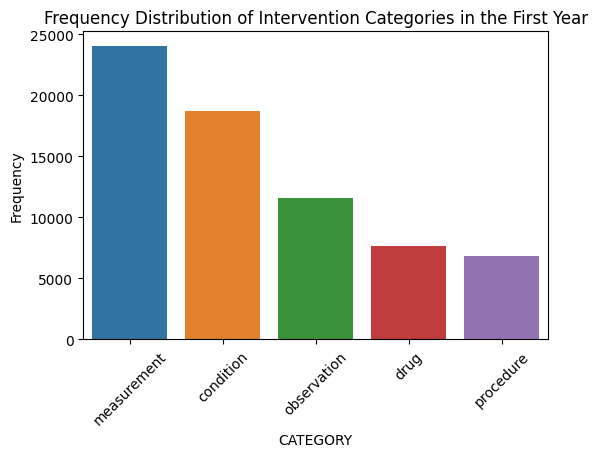

In [13]:
# Filter the dataset for the first year
first_year_data = data[data['TIME'] < 1]
# Example: Visualize the Frequency Distribution of Intervention Categories in the First Year
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='CATEGORY', data=first_year_data, order = first_year_data['CATEGORY'].value_counts().index)
plt.title('Frequency Distribution of Intervention Categories in the First Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#  Time series plot with subplots for each category

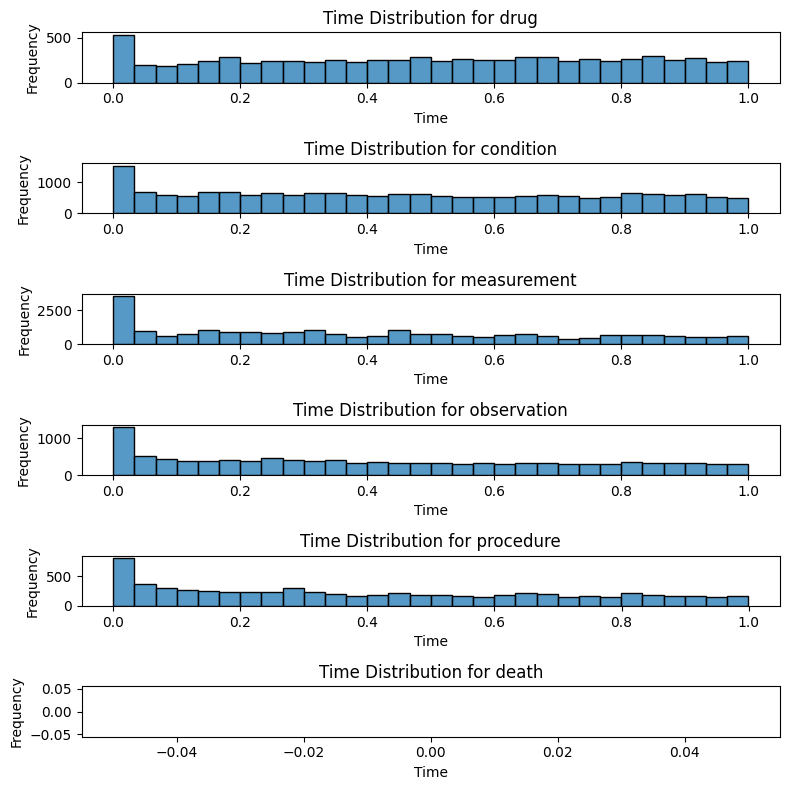

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique categories
categories = data['CATEGORY'].unique()

# Creating a figure with multiple subplots
plt.figure(figsize=(8, 8))

# Loop through each category to create a subplot
for i, category in enumerate(categories, 1):
    plt.subplot(len(categories), 1, i)
    category_data = data[(data['CATEGORY'] == category) & (data['TIME'] <= 1)]
    sns.histplot(category_data['TIME'], bins=30, kde=False)
    plt.title(f'Time Distribution for {category}')
    plt.xlabel('Time')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#  First 5 patients's interventions over time

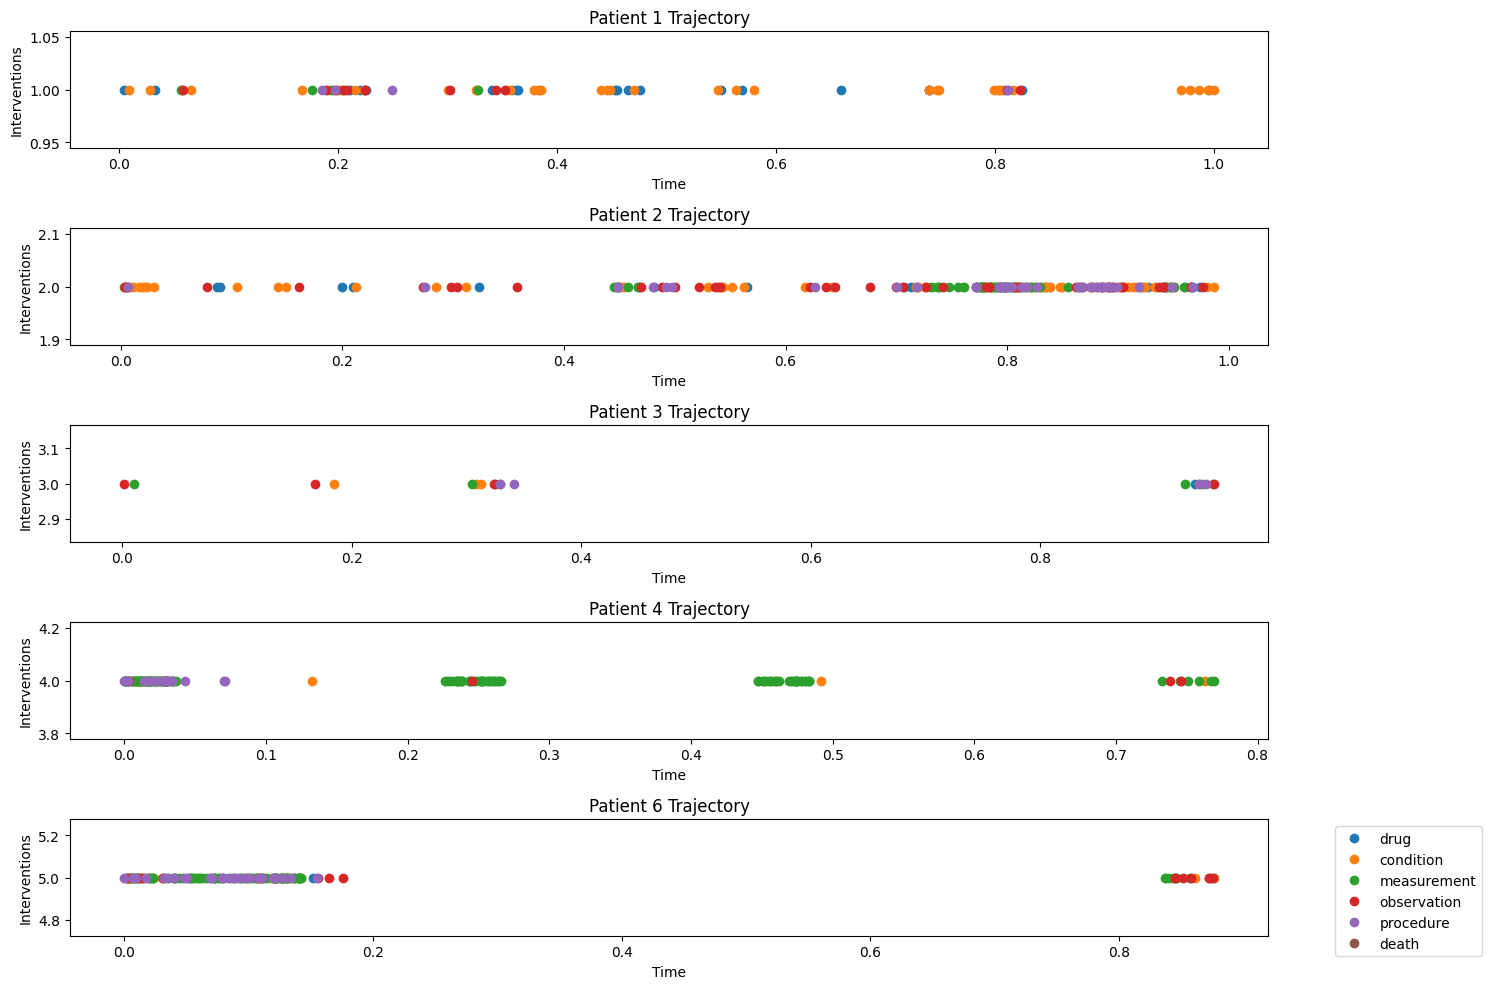

In [15]:
# Select a subset of patients
selected_patients = data['SUBJECT_ID'].unique()[:5]  # Adjust the number as needed

# Create a figure for the plots
plt.figure(figsize=(15, 10))

# Loop through the selected patients
for i, patient_id in enumerate(selected_patients, 1):
    # Filter data for the selected patient and for the first year
    patient_data = data[(data['SUBJECT_ID'] == patient_id) & (data['TIME'] <= 1)]

    plt.subplot(len(selected_patients), 1, i)
    for category in data['CATEGORY'].unique():
        # Filter data for each category
        category_data = patient_data[patient_data['CATEGORY'] == category]
        plt.plot(category_data['TIME'], np.repeat(i, len(category_data)), 'o', label=category)

    plt.title(f'Patient {patient_id} Trajectory')
    plt.xlabel('Time')
    plt.ylabel('Interventions')

# Add a legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
# Encoding categorical variables
encoder = OneHotEncoder()
encoded_categories = encoder.fit_transform(data[['CATEGORY']]).toarray()

# Generate column names for the encoded categories
categories = encoder.categories_[0]  # Getting the list of categories
encoded_column_names = [f"CATEGORY_{cat}" for cat in categories]

# Create a DataFrame with the encoded data
encoded_categories_df = pd.DataFrame(encoded_categories, columns=encoded_column_names)

# Combining the encoded categories back with the original dataset
data_encoded = data.join(encoded_categories_df)
data_encoded.tail()
# Now data_encoded contains the original data with additional columns for the one-hot encoded categories


,SUBJECT_ID,DEFINITION_ID,TIME,CATEGORY,CATEGORY_condition,CATEGORY_death,CATEGORY_drug,CATEGORY_measurement,CATEGORY_observation,CATEGORY_procedure
560966,984,measurement_1141,0.027321,measurement,0.0,0.0,0.0,1.0,0.0,0.0
560967,984,observation_156,0.028739,observation,0.0,0.0,0.0,0.0,1.0,0.0
560968,984,measurement_1140,0.030802,measurement,0.0,0.0,0.0,1.0,0.0,0.0
560969,984,measurement_1327,0.035081,measurement,0.0,0.0,0.0,1.0,0.0,0.0
560970,984,condition_459,0.038022,condition,1.0,0.0,0.0,0.0,0.0,0.0


# Train/test split

In [ ]:
# Split the dataset into training and testing sets
"""X_train, X_test, y_train, y_test = train_test_split(data.drop('TARGET_COLUMN', axis=1),
                                                    data['TARGET_COLUMN'],
                                                    test_size=0.2,
                                                    random_state=42)"""



# Creating a target variable for 1-year mortality


In [17]:
# Assuming 'DEATH_TIME' column indicates the time of death, with NaN for patients who are alive
# Create the target variable '1_YEAR_MORTALITY'
data['1_YEAR_MORTALITY'] = data['DEATH_TIME'].apply(lambda x: 1 if x <= 1 else 0)

# Now, you can engineer features from the first year's data
# For example, count the number of interventions in the first year
first_year_interventions = data[data['TIME'] <= 1].groupby('SUBJECT_ID')['DEFINITION_ID'].count()

# Join this data back to the original dataset (make sure to handle patients with no interventions in the first year)
data = data.join(first_year_interventions, on='SUBJECT_ID', rsuffix='_FIRST_YEAR_COUNT')

# Your data is now ready for further preprocessing and eventually for model training


KeyError: ignored